In [1]:
import os
import numpy as np
from PIL import Image

class DataPreprocessing:
    def __init__(self, image_size, save_dir):
        self.image_size = image_size
        self.save_dir = save_dir

    def preprocess_data(self, balanced_dataset_dir):
        # Check if preprocessed data already exists
        if self.check_preprocessed_data_exists():
            print("Preprocessed data already exists. Skipping preprocessing.")
            return self.load_preprocessed_data()
        else:
            print("Preprocessed data does not exist. Preprocessing...")

        # Create lists to store image data and corresponding labels
        image_data = []
        labels = []

        # List all class directories in the balanced dataset
        class_directories = [d for d in os.listdir(balanced_dataset_dir) if os.path.isdir(os.path.join(balanced_dataset_dir, d))]

        # Assign numerical labels to each class
        class_to_label = {class_name: i for i, class_name in enumerate(class_directories)}

        for class_dir in class_directories:
            class_path = os.path.join(balanced_dataset_dir, class_dir)
            image_files = os.listdir(class_path)
            class_label = class_to_label[class_dir]

            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)

                # Resizing and scaling the image using PIL
                with Image.open(image_path) as img:
                    img = img.resize(self.image_size) 
                    img = img.convert("L")  
                    img_array = np.array(img) / 255.0 

                image_data.append(img_array)
                labels.append(class_label)

        # Convert the lists to NumPy arrays
        image_data = np.array(image_data)
        labels = np.array(labels)

        # Save the preprocessed data
        self.save_preprocessed_data(image_data, labels)

        return image_data, labels

    def save_preprocessed_data(self, image_data, labels):
        if not os.path.exists(self.save_dir):
            os.makedirs(self.save_dir)

        np.save(os.path.join(self.save_dir, "image_data.npy"), image_data)
        np.save(os.path.join(self.save_dir, "labels.npy"), labels)

    def check_preprocessed_data_exists(self):
        return os.path.exists(os.path.join(self.save_dir, "image_data.npy")) and os.path.exists(os.path.join(self.save_dir, "labels.npy"))

    def load_preprocessed_data(self):
        image_data = np.load(os.path.join(self.save_dir, "image_data.npy"))
        labels = np.load(os.path.join(self.save_dir, "labels.npy"))
        return image_data, labels

# Example usage:
image_size = (227,227)
save_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\preprocessed_data_for_Alexnet_model"
balanced_dataset_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\balanced_dataset"

data_preprocessor = DataPreprocessing(image_size, save_dir)
image_data, labels = data_preprocessor.preprocess_data(balanced_dataset_dir)


Preprocessed data does not exist. Preprocessing...


In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def split_data(data_dir, test_size=0.35, val_size=0.5, random_state=42):
    
    #let's load the numpy files
    image_data = np.load(os.path.join(data_dir,'image_data.npy'))
    labels = np.load(os.path.join(data_dir,'labels.npy'))

    ## Let's Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(image_data,labels,test_size=test_size, random_state=random_state)
    X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,test_size=val_size, random_state=random_state)

    return X_train, y_train, X_test, y_test,X_val, y_val

data_dir = r"F:\End_To_End_project\Kidney_Disease_Classification_DL\data\preprocessed_data_for_Alexnet_model"
X_train, y_train, X_test, y_test, X_val, y_val = split_data(data_dir,)


In [2]:
print(f"Shape of x_train data :{X_train.shape}")
print(f"Shape of y_train data :{y_train.shape}")
print(f"Shape of x_val data :{X_val.shape}")
print(f"Shape of y_val data :{y_val.shape}")
print(f"Shape of X_test data :{X_test.shape}")
print(f"Shape of y_test data :{y_test.shape}")

Shape of x_train data :(3580, 227, 227)
Shape of y_train data :(3580,)
Shape of x_val data :(964, 227, 227)
Shape of y_val data :(964,)
Shape of X_test data :(964, 227, 227)
Shape of y_test data :(964,)


In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

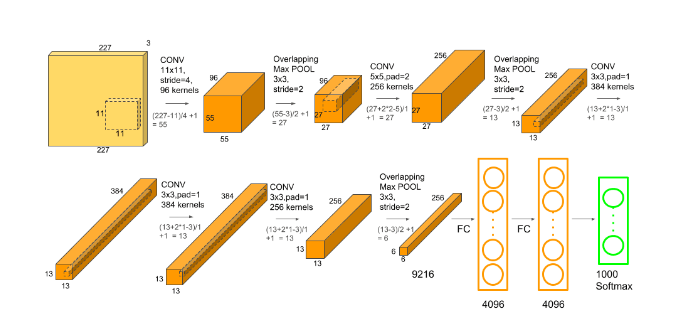

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Creating an AlexNet-like model
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))  


model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(units=4, activation='softmax')) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 384)         1

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_Alexnet_model.h5',
                             monitor = 'val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              patience=5,
                              verbose=1)

callbacks = [checkpoint, earlystopping]

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val),callbacks=callbacks)


Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 1.3095 - accuracy: 0.3444
Epoch 1: val_accuracy improved from -inf to 0.39419, saving model to best_Alexnet_model.h5


f:\End_To_End_project\Kidney_Disease_Classification_DL\kidney\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


112/112 [==============================] - 450s 4s/step - loss: 1.3095 - accuracy: 0.3444 - val_loss: 1.2365 - val_accuracy: 0.3942
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 1.0402 - accuracy: 0.5154
Epoch 2: val_accuracy improved from 0.39419 to 0.52282, saving model to best_Alexnet_model.h5
112/112 [==============================] - 485s 4s/step - loss: 1.0402 - accuracy: 0.5154 - val_loss: 0.9366 - val_accuracy: 0.5228
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.7670
Epoch 3: val_accuracy improved from 0.52282 to 0.86307, saving model to best_Alexnet_model.h5
112/112 [==============================] - 342s 3s/step - loss: 0.5764 - accuracy: 0.7670 - val_loss: 0.3586 - val_accuracy: 0.8631
Epoch 4/50
112/112 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.8922
Epoch 4: val_accuracy improved from 0.86307 to 0.92635, saving model to best_Alexnet_model.h5
112/112 [=========================